**Описание:**

Перед вами стоит бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. Также стоит задача выявить потенциальную сезонность.

<br><br>

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

In [137]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import datetime as dt
from datetime import timedelta
import statistics
import seaborn as sns

In [51]:
df1 = pd.read_csv('course_contents.csv')
df2 = pd.read_csv('courses.csv')
df3 = pd.read_csv('progress_phases.csv')
df4 = pd.read_csv('progresses.csv')
df_students = pd.read_csv('students.csv')

del df_students['id_']
df_students.columns = ['student_id', 'city', 'birthday']

df_total = df1.merge(df4, on = 'course_id')
del df2['Unnamed: 0']
df2.columns = ['course_id', 'title', 'field']
df_total = df_total.merge(df2, on = 'course_id')
df_total.columns = ['course_id', 'module_number', 'module_title', 'lesson_number',
       'lesson_title', 'lesson_token', 'is_video', 'is_homework', 'progress_id',
       'student_id', 'title', 'field']
df_total = df_total.merge(df3, on = ['progress_id', 'module_number', 'lesson_number'])

df_total.head()

,course_id,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework,progress_id,student_id,title,field,status,start_date,finish_date
0,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",1,Знакомство,aa344de3-1191-4e69-b485-61823118f71c,True,False,5767046d89ed7563a0c3a9a3896a23e6,768c2987a744c51ce64a5993a2a94eaf,Анимация интерфейсов,Design,done,2018-01-13 15:20:23+00,2018-01-13 15:20:23+00
1,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",1,Знакомство,aa344de3-1191-4e69-b485-61823118f71c,True,False,46dae25e2b7fba1f4d8dad9fd336f002,fcd7b6853c2582372980dd6af56d3bdc,Анимация интерфейсов,Design,done,2018-08-27 12:02:06.028224+00,2018-09-09 20:06:32.491561+00
2,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",1,Знакомство,aa344de3-1191-4e69-b485-61823118f71c,True,False,e4897c239bcf0cbf7b081c8de86eb893,5c133b73eecb3743a4caa59820d3bd6b,Анимация интерфейсов,Design,start,2018-04-03 16:36:54.023829+00,NaN
3,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",1,Знакомство,aa344de3-1191-4e69-b485-61823118f71c,True,False,74a8dfd09177bd1726a2fbc8650d960c,93a4336fce3f6acbbf464bc87ec3e187,Анимация интерфейсов,Design,start,2018-08-30 08:39:54.271306+00,NaN
4,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",1,Знакомство,aa344de3-1191-4e69-b485-61823118f71c,True,False,768b2e66167e6f94a36c99ce91b6a06f,315627e674826fb29ea8cf1f41adcda1,Анимация интерфейсов,Design,start,2018-05-29 12:43:47.11977+00,NaN


In [52]:
#общее количество курсов в датасете
df_total['title'].nunique()

15

In [53]:
#количество модулей на каждом курсе
df_total.groupby('title')['module_title'].nunique()

title
Excel Базовый                           9
Java-разработчик                       17
Java-разработчик c нуля                 9
JavaScript с нуля                      18
PHP-разработчик с 0 до PRO. Часть 1     8
SMM-маркетолог от А до Я               11
UX-дизайн                              20
Анимация интерфейсов                   21
Веб-вёрстка для начинающих 2.0          8
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Веб-дизайн с нуля 2.0                  19
Веб-разработчик                        20
Интернет-маркетолог от Ingate          18
Руководитель digital-проектов          17
Name: module_title, dtype: int64

In [54]:
df_total.groupby(['title', 'module_title'])['lesson_token'].nunique() #количество уроков в каждом модуле на каждом курсе

title                          module_title                                       
Excel Базовый                   Визуализация данных Excel                              5
                               Основной функционал Excel                              11
                               Основной функционал Excel (продолжение)                 7
                               Сводные таблицы Excel                                   5
                               Формулы и функции Excel. Более сложные формулы          5
                                                                                      ..
Руководитель digital-проектов  Решение факапов. Lean/TOC. Обзор.                       5
                               Требовательность digital-продюсера                      4
                               Управление временем                                     4
                               Управление дизайнерами. Разработка дизайна по scrum     7
                           

In [55]:
#медианное количество уроков в модуле на каждом курсе
df_total.groupby(['title', 'module_title'])['lesson_token'].nunique().median()

5.0

In [56]:
#количество учеников на каждом курсе
df_total.groupby('title')['student_id'].nunique()

title
Excel Базовый                           782
Java-разработчик                        763
Java-разработчик c нуля                 581
JavaScript с нуля                       966
PHP-разработчик с 0 до PRO. Часть 1     854
SMM-маркетолог от А до Я                506
UX-дизайн                              1151
Анимация интерфейсов                    598
Веб-вёрстка для начинающих 2.0         2004
Веб-дизайн PRO 2.0                     1711
Веб-дизайн Базовый                      518
Веб-дизайн с нуля 2.0                  2014
Веб-разработчик                         628
Интернет-маркетолог от Ingate          2168
Руководитель digital-проектов           685
Name: student_id, dtype: int64

In [57]:
#минимальный, максимальный, средний, медианный возраст студентов
now = pd.Timestamp('now')

df_students1 = df_students.dropna()
df_students1['birthday'] = pd.to_datetime(df_students1['birthday'], errors='coerce')
df_students1['birthday'].dropna()
df_students1['birthday'] = df_students1['birthday'].where(df_students1['birthday'] < now, df_students1['birthday'] -  np.timedelta64(100, 'Y'))
df_students1['birthday'] = (now - df_students1['birthday']).astype('<m8[Y]')
df_students1 = df_students1[(df_students1['birthday'] < 100) & (df_students1['birthday'] > 10)]
df_students1['birthday'].describe()

<ipython-input-57-3d97b11bfb23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_students1['birthday'] = pd.to_datetime(df_students1['birthday'], errors='coerce')
<ipython-input-57-3d97b11bfb23>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_students1['birthday'] = df_students1['birthday'].where(df_students1['birthday'] < now, df_students1['birthday'] -  np.timedelta64(100, 'Y'))
<ipython-input-57-3d97b11bfb23>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

count    11281.000000
mean        30.558372
std          7.337494
min         11.000000
25%         26.000000
50%         30.000000
75%         35.000000
max         98.000000
Name: birthday, dtype: float64

In [58]:
#минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
df_total_with_students = df_total.merge(df_students1, on = 'student_id')
df_total_with_students.columns = ['course_id', 'module_number', 'module_title', 'lesson_number',
       'lesson_title', 'lesson_token', 'is_video', 'is_homework',
       'progress_id', 'student_id', 'title', 'field', 'status', 'start_date',
       'finish_date', 'city', 'age']
df_total_with_students.groupby('title')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
Excel Базовый,9884.0,34.041785,6.839199,17.0,29.0,34.0,39.0,61.0
Java-разработчик,19974.0,30.551467,7.895707,15.0,25.0,29.0,35.0,65.0
Java-разработчик c нуля,7130.0,30.323843,7.438430,15.0,25.0,29.0,34.0,55.0
JavaScript с нуля,16612.0,29.181315,6.456356,14.0,24.0,28.0,33.0,60.0
PHP-разработчик с 0 до PRO. Часть 1,4815.0,31.781101,8.351084,14.0,26.0,30.0,36.0,75.0
SMM-маркетолог от А до Я,3515.0,29.479374,6.205485,18.0,25.0,28.0,33.0,52.0
UX-дизайн,17681.0,31.200950,6.159802,16.0,27.0,31.0,34.0,86.0
Анимация интерфейсов,4994.0,31.068282,7.435681,16.0,27.0,30.0,34.0,86.0
Веб-вёрстка для начинающих 2.0,22724.0,29.311433,6.800658,14.0,24.0,28.0,33.0,60.0


**1.2**

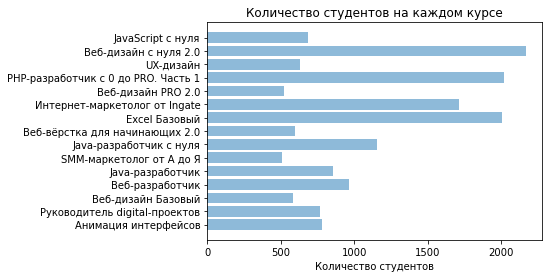

In [59]:
#bar-chart, отражающий количество студентов на каждом курсе.
students_list = df_total.groupby('title')['student_id'].nunique().to_list()
courses_list = df_total['title'].unique().tolist()

x = courses_list
y = students_list

plt.barh(x, y, align='center', alpha=0.5)
plt.xlabel('Количество студентов')
plt.title('Количество студентов на каждом курсе')

plt.show()


**1.3**

In [60]:
df_bar1 = df_total.groupby(['title', 'field'])['student_id'].nunique()
df_bar1 = pd.DataFrame(df_bar1)
df_bar1 = df_bar1.sort_values('student_id', ascending=False)
df_bar2 = df_bar1.unstack()
df_bar2

student_id                              
field                                 Business  Design Development Marketing
title                                                                       
Excel Базовый                            782.0     NaN         NaN       NaN
Java-разработчик                           NaN     NaN       763.0       NaN
Java-разработчик c нуля                    NaN     NaN       581.0       NaN
JavaScript с нуля                          NaN     NaN       966.0       NaN
PHP-разработчик с 0 до PRO. Часть 1        NaN     NaN       854.0       NaN
SMM-маркетолог от А до Я                   NaN     NaN         NaN     506.0
UX-дизайн                                  NaN  1151.0         NaN       NaN
Анимация интерфейсов                       NaN   598.0         NaN       NaN
Веб-вёрстка для начинающих 2.0             NaN     NaN      2004.0       NaN
Веб-дизайн PRO 2.0                         NaN  1711.0         NaN       NaN
Веб-дизайн Базовый                         NaN   518.0         NaN       NaN
Веб-дизайн с нуля 2.0                      NaN  2014.0         NaN       NaN
Веб-разработчик                            NaN     NaN       628.0       NaN
Интернет-маркетолог от Ingate              NaN     NaN         NaN    2168.0
Руководитель digital-проектов            685.0     NaN         NaN       NaN

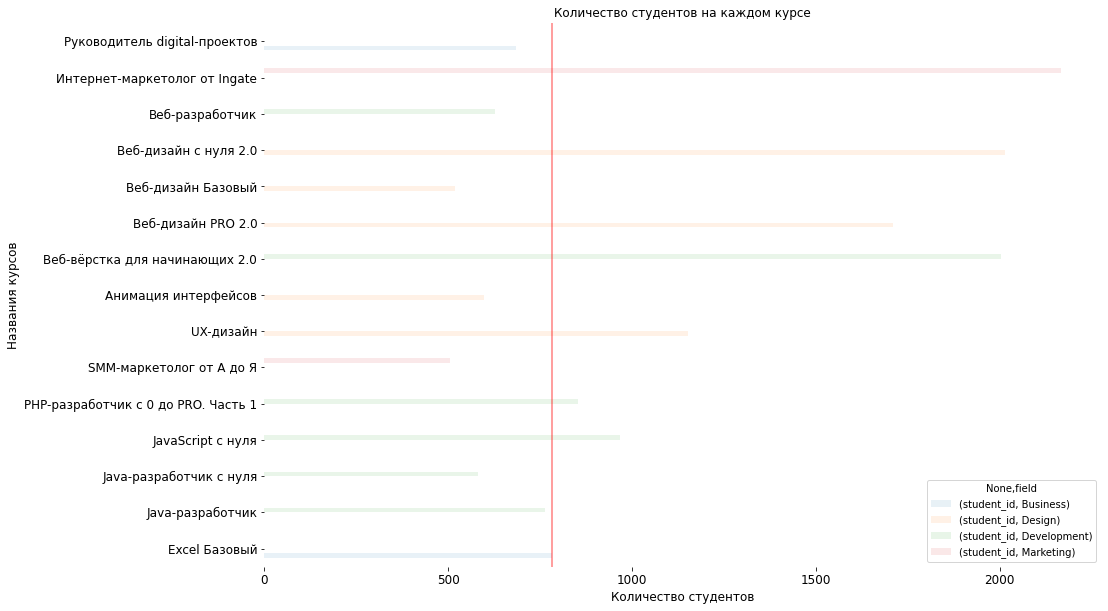

In [61]:
ax = df_bar2.plot(kind='barh', title ="Количество студентов на каждом курсе", \
                 figsize=(15, 10), legend=True, fontsize=12, alpha=0.1)
ax.set_xlabel("Количество студентов", fontsize=12)
ax.set_ylabel("Названия курсов", fontsize=12)
plt.axvline(df_bar1['student_id'].median(), color='r', linestyle='-', label='медиана', alpha=0.5)
plt.box(on=None)

plt.show()

**Исходя из полученных данных можно сделать вывод, что:**  
1) Курсы из сферы *"Design"* являются более популярными по сравнению с остальными.  
2) Большинство курсов состоит из более чем 17 модулей.  
3) Средний возраст студентов не сильно разнится в зависимости от курса и находится в диапазоне от 28 до 34 лет.  
4) Максимальный возраст студентна 86 лет и они так же выбрали курсы из сферы *"Design"*.  
5) Медиана кол-ва студентов по курсам расположена на высоком значении только лишь благодаря нескольким курсам (**"Интернет-маркетолог от Ingate", "Веб-дизайн с нуля 2.0", "Веб-верстка для начинающих 2.0", "Веб-дизайн PRO 2.0"**).  

-------------------------------------------------------------------------------------------

## 2. Расчет потенциальной нагрузки на преподавателей

In [62]:
df_total[(df_total['title']=='Excel Базовый')&(df_total['is_homework']==True)&(df_total['module_number']==1)].sort_values('start_date')

,course_id,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework,progress_id,student_id,title,field,status,start_date,finish_date
126748,ac634845fb0350d0e9d49078aaa4b68f,1,Основной функционал Excel,11,Домашняя работа,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,False,True,fb1d6033c725acd83b449b892a93789f,c7d9f03162dab0e04e28067dafddb050,Excel Базовый,Business,done,2018-02-19 12:32:48.645567+00,2018-02-20 09:16:25.980894+00
126865,ac634845fb0350d0e9d49078aaa4b68f,1,Основной функционал Excel,11,Домашняя работа,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,False,True,480b5796fe7b90e6c971778b62994c5a,0d26ca1f35d89ee06970eadd007c9eab,Excel Базовый,Business,done,2018-02-19 12:32:52.450442+00,2018-02-20 09:06:25.987187+00
127115,ac634845fb0350d0e9d49078aaa4b68f,1,Основной функционал Excel,11,Домашняя работа,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,False,True,f4779625712bc80e8d186be5d52d18ea,d1121122c6378eeae3e8ab2b57a7fb5c,Excel Базовый,Business,done,2018-02-19 12:33:38.115555+00,2018-02-20 09:16:35.846391+00
126946,ac634845fb0350d0e9d49078aaa4b68f,1,Основной функционал Excel,11,Домашняя работа,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,False,True,aa268be4c96ab1392a67c1d5d249b949,31e7a1e3da97d993581bb416e553c216,Excel Базовый,Business,done,2018-02-19 12:34:49.544364+00,2018-02-20 09:16:31.730099+00
127088,ac634845fb0350d0e9d49078aaa4b68f,1,Основной функционал Excel,11,Домашняя работа,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,False,True,3dbb66b573a341054d2ec18c20956d37,eda4e489680ba93c58b4e3f4f170d7a5,Excel Базовый,Business,done,2018-02-21 15:31:04.411881+00,2018-02-21 15:31:04.411609+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126738,ac634845fb0350d0e9d49078aaa4b68f,1,Основной функционал Excel,11,Домашняя работа,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,False,True,7f7a21c1f71f0c48ba9b915efe3bf794,c89927c34528144d489fd46635020849,Excel Базовый,Business,start,2019-07-12 13:51:01.83916+00,NaN
126968,ac634845fb0350d0e9d49078aaa4b68f,1,Основной функционал Excel,11,Домашняя работа,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,False,True,751719fde48bbac3ad123138f047427e,dafddc3ddc101784033c502439230bfd,Excel Базовый,Business,done,2019-07-14 16:14:26.750265+00,2019-07-16 06:02:09.646098+00
126772,ac634845fb0350d0e9d49078aaa4b68f,1,Основной функционал Excel,11,Домашняя работа,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,False,True,c03e38e2094c191cb3d9c2d93b91ee26,22c9093fa46dd35d5a04f033eb82bdcf,Excel Базовый,Business,start,2019-07-15 05:09:53.85991+00,NaN
126765,ac634845fb0350d0e9d49078aaa4b68f,1,Основной функционал Excel,11,Домашняя работа,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,False,True,168b8bcc10ccfd70355dff4a111b2f35,4188566aa7b23017fcf2883197b820da,Excel Базовый,Business,done,2019-07-15 10:03:21.057363+00,2019-07-17 02:15:50.671212+00


**2.1, 2.2**

C:\Users\Ilya\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


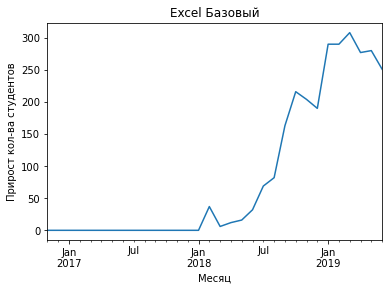

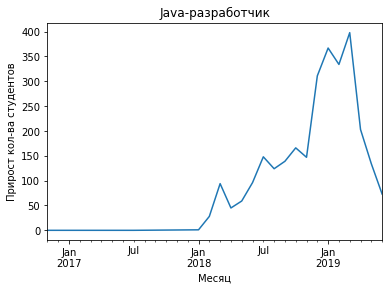

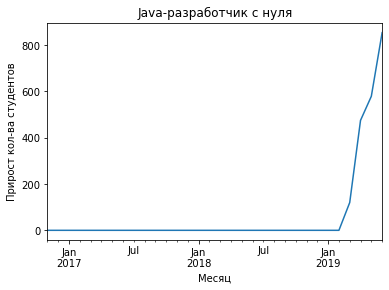

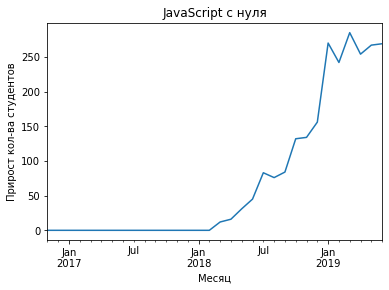

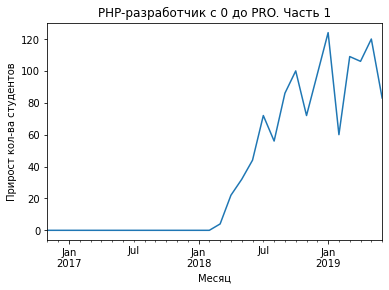

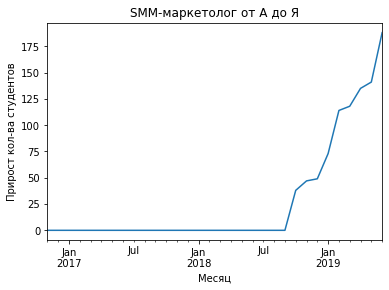

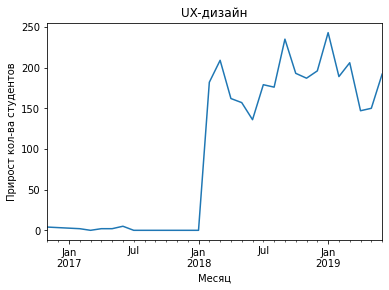

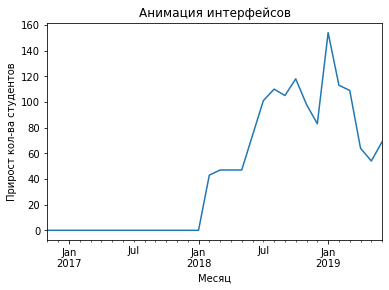

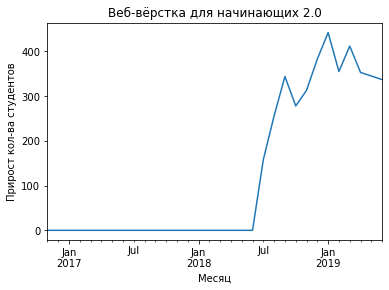

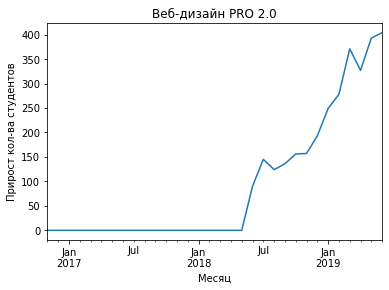

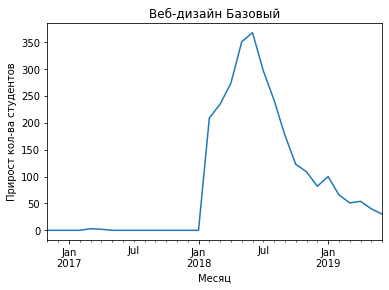

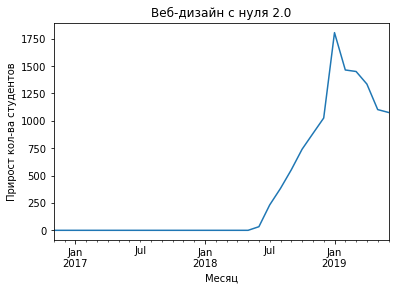

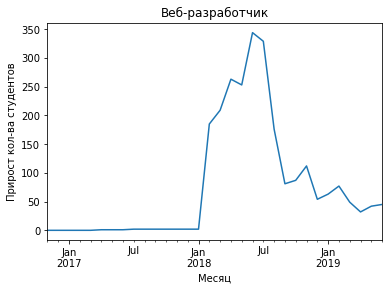

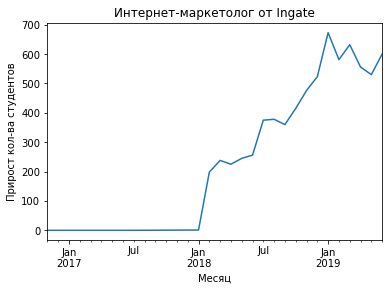

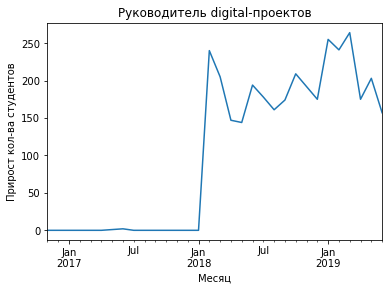

In [63]:
#Прирост студентов на каждом курсе в каждом месяце за всю историю
df = df_total[(df_total['is_homework'] == True)]
df_1 = df.groupby('title')['module_number'].agg('min')
df_1 = pd.DataFrame(df_1).reset_index()
df_2 = pd.merge(df_1, df, on=['title', 'module_number'], how='right', right_index=True)

df_2 = df_2.groupby('title')['start_date'].value_counts()
df_2 = pd.DataFrame(df_2).unstack(fill_value=0).stack()
df_2.columns = ['counts']
df_2.reset_index(inplace=True)
df_2['start_date'] = pd.to_datetime(df_2['start_date'])
df_2['start_date'] = df_2['start_date'].dt.to_period('M')
df_2 = df_2[(df_2['start_date'] > '2016-03') & (df_2['start_date'] < '2019-07')]
df_2 = df_2.groupby(['title', 'start_date'])['counts'].sum()
df_2 = pd.DataFrame(df_2)
df_2.reset_index(inplace=True)

for i in df_2.groupby('title'):
    subdf = i[1].set_index('start_date')
    ax = subdf.plot.line(title=i[0], legend=False)
    ax.set_xlabel('Месяц')
    ax.set_ylabel('Прирост кол-ва студентов')
    plt.show()

**2.3**

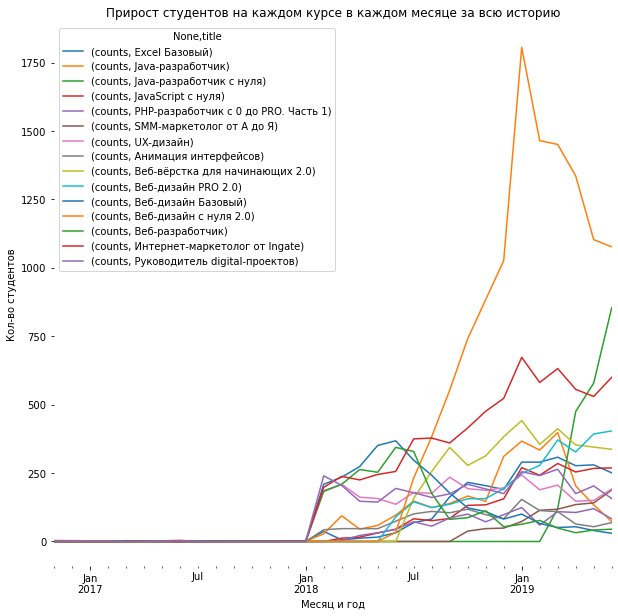

In [64]:
#прирост студентов в каждом месяце для каждого курса
df_2 = df_2.pivot_table(index='start_date', columns='title')
ax = df_2.plot.line(figsize=(10,10), legend=True, title='Прирост студентов на каждом курсе в каждом месяце за всю историю')
ax.set_xlabel('Месяц и год')
ax.set_ylabel('Кол-во студентов')
plt.box(on=None)
plt.show()

**2.4, 2.5**

In [65]:
def list_date(a, b):
    return pd.date_range(start=a, end=b, freq='D').to_list()

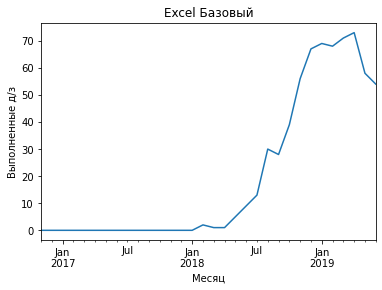

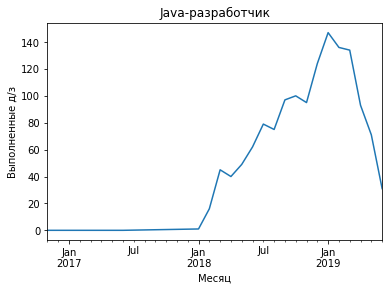

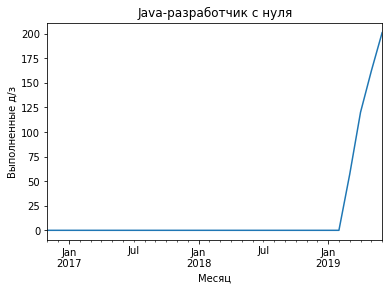

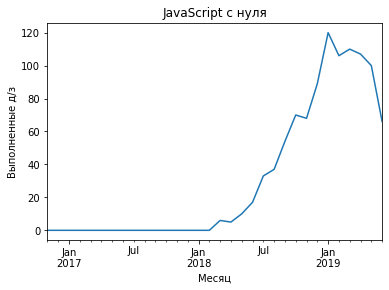

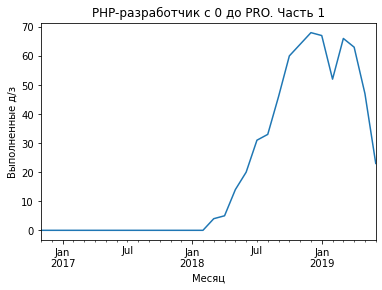

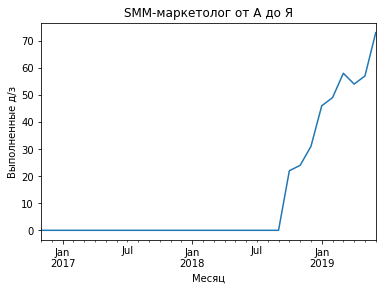

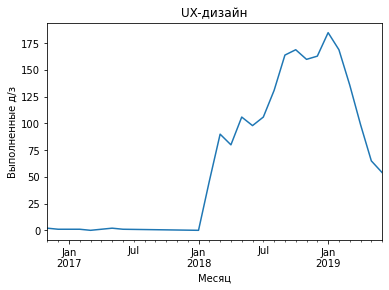

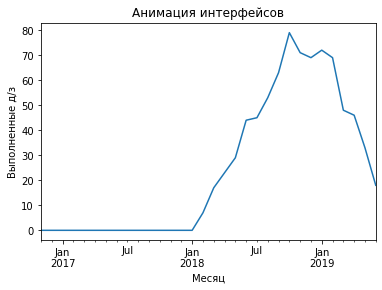

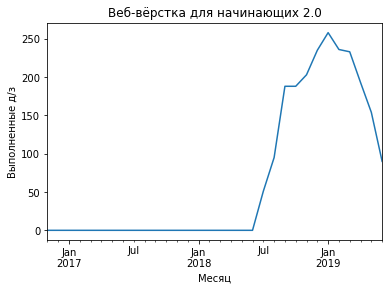

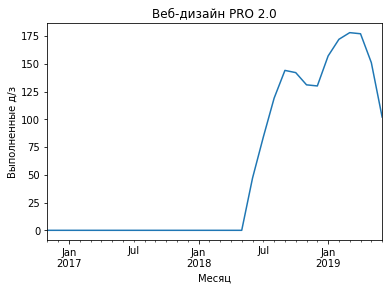

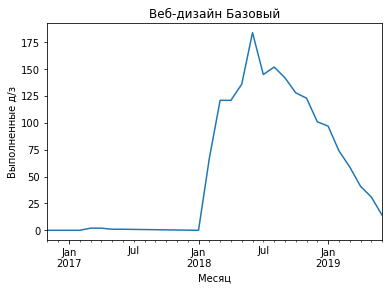

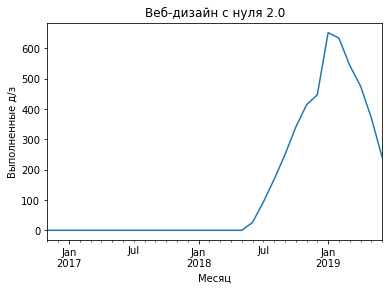

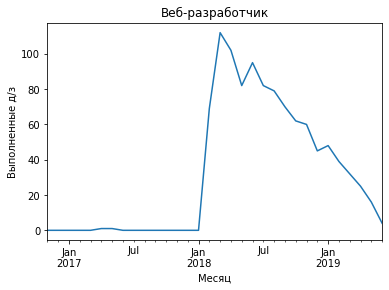

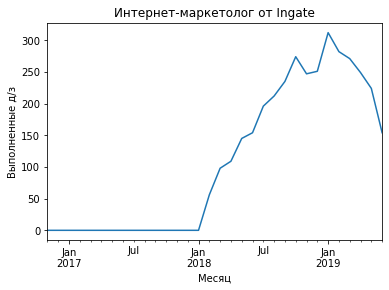

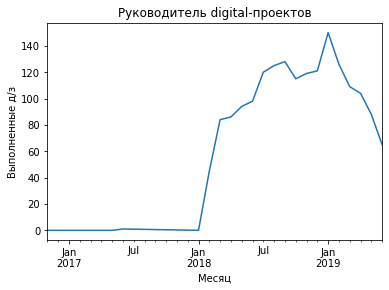

In [66]:
#количество прогрессов по выполнению домашних работ в каждом месяце за всю историю
df_4 = df_total.fillna(0)
df_4 = df_4[(df_4['is_homework'] == True) & (df_4['finish_date'] != 0)]
df_4['finish_date'] = pd.to_datetime(df_4['finish_date']).dt.date
df_4['start_date'] = pd.to_datetime(df_4['start_date']).dt.date
df_4['hw_days'] = df_4.apply(lambda x: pd.date_range(start=x['start_date'], end=x['finish_date'], freq='M').to_list(), axis=1)
df_4 = df_4.explode('hw_days')

df_4 = df_4.groupby('title')['hw_days'].value_counts()
df_4 = pd.DataFrame(df_4).unstack(fill_value=0).stack()
df_4.columns = ['counts']
df_4.reset_index(inplace=True)
df_4['hw_days'] = df_4['hw_days'].dt.to_period('M')
df_4 = df_4[(df_4['hw_days'] > '2016-03') & (df_4['hw_days'] <= '2019-07')]
df_4 = df_4.groupby(['title', 'hw_days'])['counts'].sum()
df_4 = pd.DataFrame(df_4)
df_4.reset_index(inplace=True)

for i in df_4.groupby('title'):
    subdf_2 = i[1].set_index('hw_days')
    ax = subdf_2.plot.line(title=i[0], legend=False)
    ax.set_xlabel('Месяц')
    ax.set_ylabel('Выполненные д/з')
    plt.show()

**2.6**

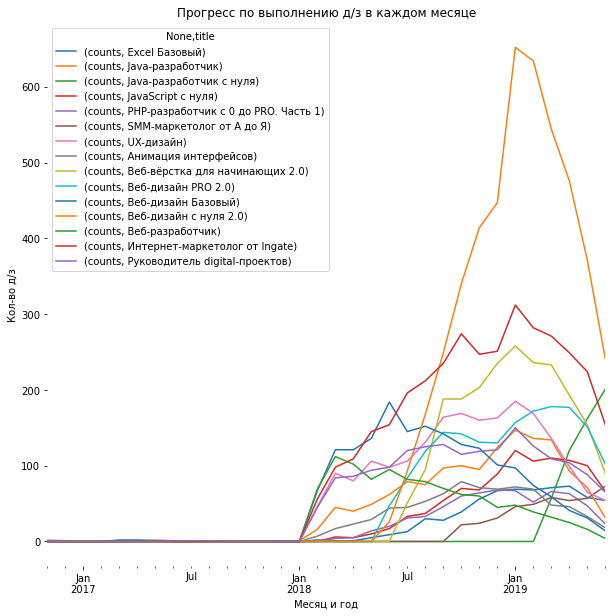

In [67]:
df_5 = df_4.pivot_table(index='hw_days', columns='title')
ax = df_5.plot.line(figsize=(10,10), legend=True, title='Прогресс по выполнению д/з в каждом месяце')
ax.set_xlabel('Месяц и год')
ax.set_ylabel('Кол-во д/з')
plt.box(on=None)
plt.show()

**2.7**

**Исходя из полученных данных можно сделать вывод, что:**  

1) До января 2019 года курс **"Java-разработчик"** рос очень высокими темпами по сравнению с другими представленными курсами, потом начался резкий спад как в приросте студентов, так и в прогрессе выполнения домашних работ и продолжился до границы заданного временного промежутка.  

2) С февраля 2019 года произошел резкий взлёт курса **"Веб-разработчик"**, в то время как остальные были на спаде. На это омжет быть несколько причин. Начиная от повышенного спроса и дефицита сотрудников в данной сфере, так и особые условия обучения от Skillbox.  

3) Примерно с января 2019 года началась общая тенденция среди всех курсов на спад как показателей прироста кол-ва студентов, так и в прогрессе д/з. Одной из причин можно назвать ухудшающееся финансовое положение потенциальных клиентов, дефицит свободного времени.  

4) Студенты на курсе **"Веб-вёрстка для начинающих 2.0"** и **"Java-разработчик"** одни из самых активных. Показатель прогресса выполнения д/з ощутим, хоть и прирост кол-ва студентов является немногим выше среднего.  

5) Курс **"Java-разработчик с нуля"** получился несовсем удачным. Об этом свидетельствует то, что на протяжении всего заданного временного промежутка с даты открытия курса (за исключением первых 6ти месяцев) показатели имеют отрицательную динамику. 

-------------------------------------------------------------------------------------------

## 3. Выявление проблемных модулей

**3.1**

In [68]:
#минимальное, максимальное, среднее, медианное время прохождения каждого модуля
df = df_total_with_students[(df_total_with_students['is_homework'] == True) & (df_total_with_students['status'] == 'done')]

df['start_date'] = pd.to_datetime(pd.to_datetime(df['start_date']).dt.strftime('%Y/%m/%d'))
df['finish_date'] = pd.to_datetime(pd.to_datetime(df['finish_date']).dt.strftime('%Y/%m/%d'))

df = df.groupby(['title', 'module_title', 'student_id']).agg({'start_date' : 'min', 'finish_date' : 'max'}).reset_index()
df['duration'] = df[['start_date','finish_date']].apply(lambda x: (x['finish_date']-x['start_date']).days, axis=1)

df = df.groupby(['title', 'module_title']).agg({'duration' : ['min', 'max', 'median', 'mean']})
df

<ipython-input-68-6d0d0e8d271a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_date'] = pd.to_datetime(pd.to_datetime(df['start_date']).dt.strftime('%Y/%m/%d'))
<ipython-input-68-6d0d0e8d271a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['finish_date'] = pd.to_datetime(pd.to_datetime(df['finish_date']).dt.strftime('%Y/%m/%d'))


duration  \
                                                                                      min   
title                         module_title                                                  
Excel Базовый                  Визуализация данных Excel                                0   
                              Основной функционал Excel                                 0   
                              Основной функционал Excel (продолжение)                   0   
                              Сводные таблицы Excel                                     0   
                              Формулы и функции Excel. Более сложные формулы            0   
...                                                                                   ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                         0   
                              Требовательность digital-продюсера                        0   
                              Управление временем                                       0   
                              Управление дизайнерами. Разработка дизайна по s...        0   
                              Экологичный путь менеджера                                0   

                                                                                       \
                                                                                  max   
title                         module_title                                              
Excel Базовый                  Визуализация данных Excel                           84   
                              Основной функционал Excel                           184   
                              Основной функционал Excel (продолжение)             185   
                              Сводные таблицы Excel                               239   
                              Формулы и функции Excel. Более сложные формулы      133   
...                                                                               ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                   212   
                              Требовательность digital-продюсера                  397   
                              Управление временем                                 164   
                              Управление дизайнерами. Разработка дизайна по s...  199   
                              Экологичный путь менеджера                          246   

                                                                                         \
                                                                                 median   
title                         module_title                                                
Excel Базовый                  Визуализация данных Excel                            4.5   
                              Основной функционал Excel                             2.0   
                              Основной функционал Excel (продолжение)               2.0   
                              Сводные таблицы Excel                                 3.0   
                              Формулы и функции Excel. Более сложные формулы        3.0   
...                                                                                 ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                     8.0   
                              Требовательность digital-продюсера                    9.0   
                              Управление временем                                   5.0   
                              Управление дизайнерами. Разработка дизайна по s...    8.0   
                              Экологичный путь менеджера                            3.0   

                                                                                             
                                                                                       mean  
title                         module_title                          

**3.2**

In [69]:
df.columns = df.columns.droplevel(0)
df.reset_index(inplace=True)
df1 = df.drop(['min', 'max', 'mean'], axis=1)

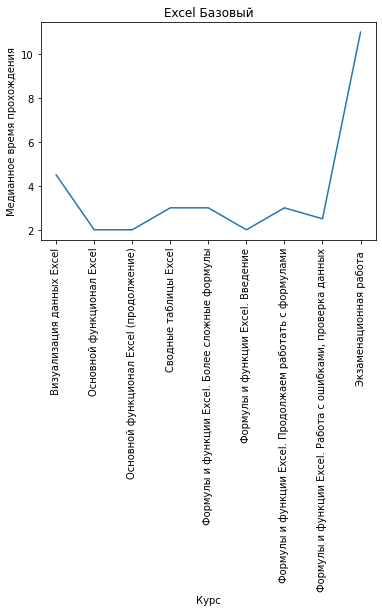

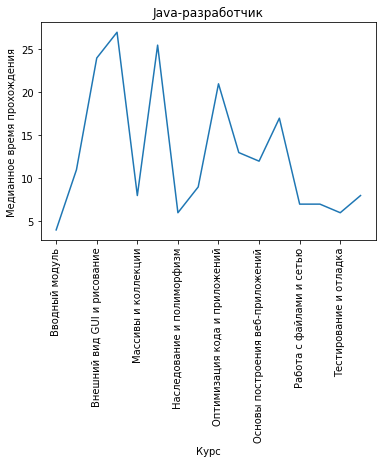

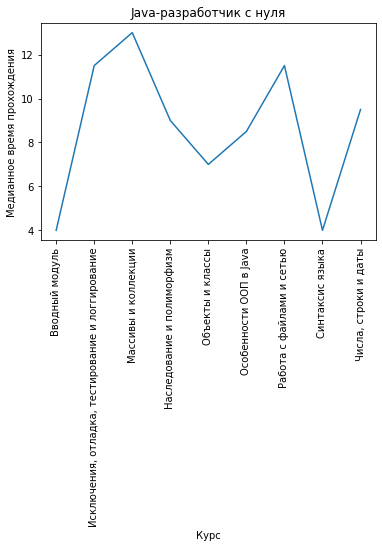

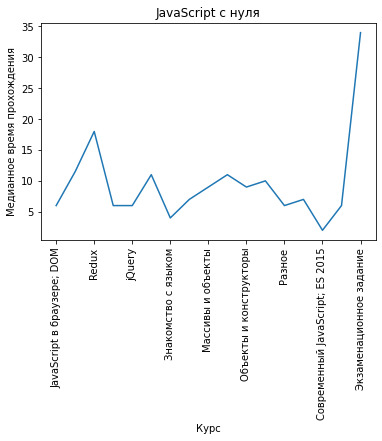

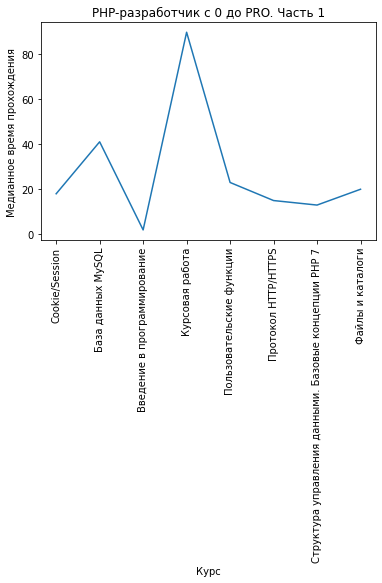

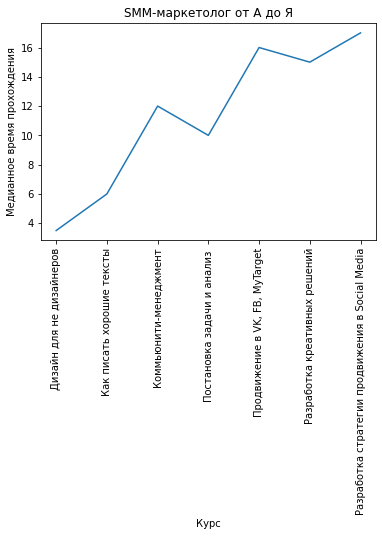

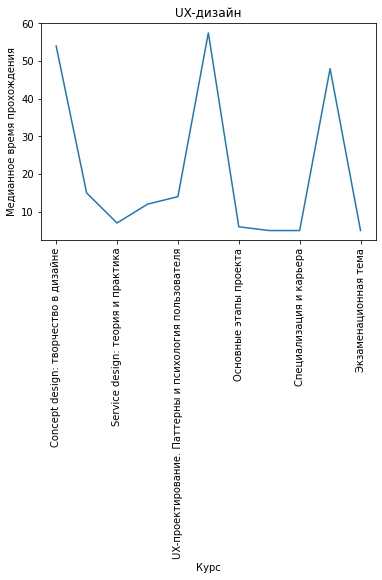

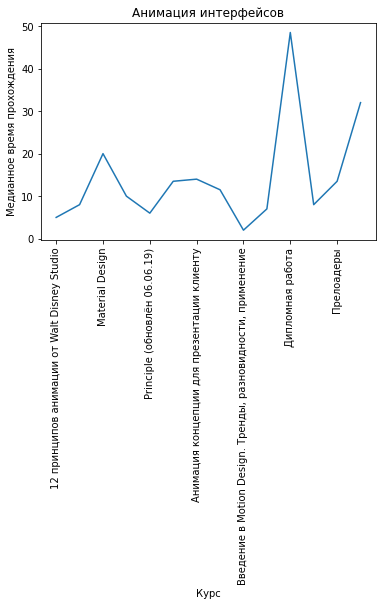

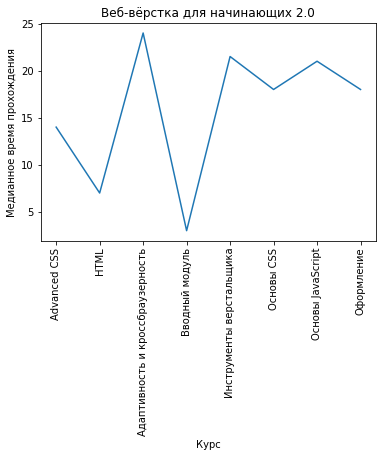

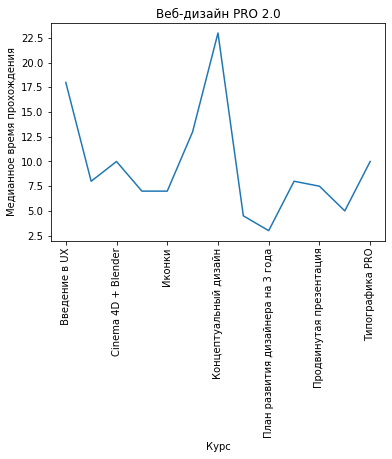

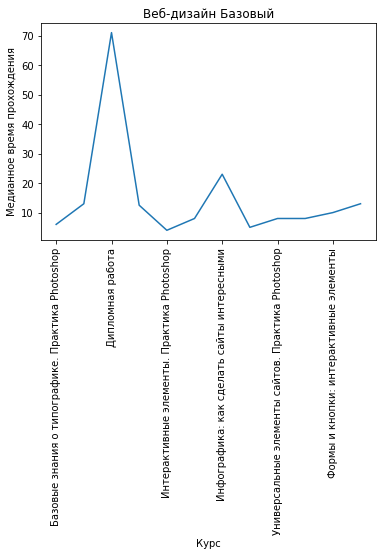

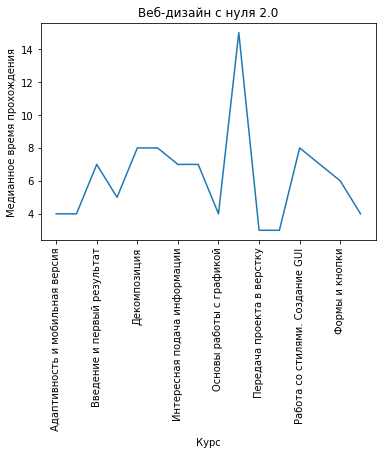

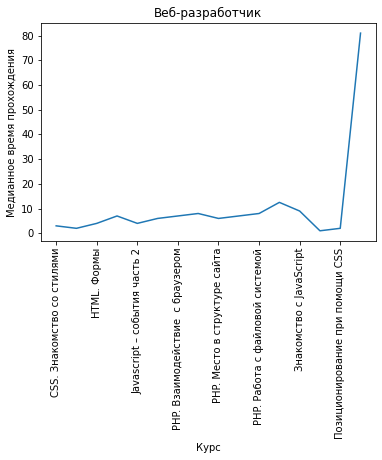

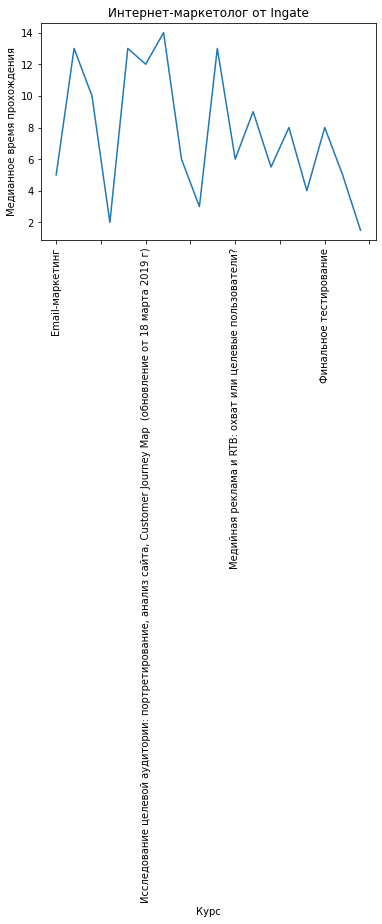

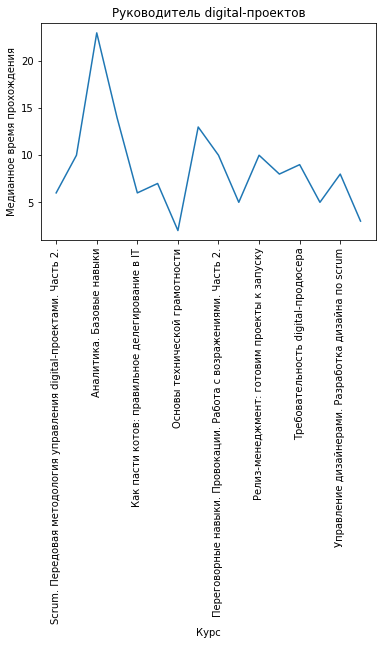

In [70]:
#line-graph с медианным временем прохождения каждого модуля для каждого курса
for i in df1.groupby('title'):
    subdf_2 = i[1].set_index('module_title')
    ax = subdf_2.plot.line(title=i[0], legend=False)
    ax.set_xlabel('Курс')
    ax.set_ylabel('Медианное время прохождения')
    plt.xticks(rotation=90)
    plt.show()

**3.3**

In [71]:
#медианное время выполнения домашней работы по месяцам
df = df_total_with_students[(df_total_with_students['is_homework'] == True) & (df_total_with_students['status'] == 'done')]

df['start_date'] = pd.to_datetime(pd.to_datetime(df['start_date']).dt.strftime('%Y/%m/%d'))
df['finish_date'] = pd.to_datetime(pd.to_datetime(df['finish_date']).dt.strftime('%Y/%m/%d'))

df = df.groupby(['title', 'student_id']).agg({'start_date' : 'min', 'finish_date' : 'max'}).reset_index()

df['duration'] = df[['start_date','finish_date']].apply(lambda x: (x['finish_date']-x['start_date']).days, axis=1)
df['month'] = df['start_date'].dt.month_name()

df = df.groupby(['title', 'month']).agg({'duration' : 'median'})
df


<ipython-input-71-3d515abaaa7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_date'] = pd.to_datetime(pd.to_datetime(df['start_date']).dt.strftime('%Y/%m/%d'))
<ipython-input-71-3d515abaaa7b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['finish_date'] = pd.to_datetime(pd.to_datetime(df['finish_date']).dt.strftime('%Y/%m/%d'))


duration
title                         month              
Excel Базовый                 April          37.5
                              August         77.0
                              December       29.0
                              February       70.0
                              January        37.0
...                                           ...
Руководитель digital-проектов March         101.0
                              May            68.5
                              November      166.0
                              October        62.0
                              September     122.0

[171 rows x 1 columns]

**3.4**

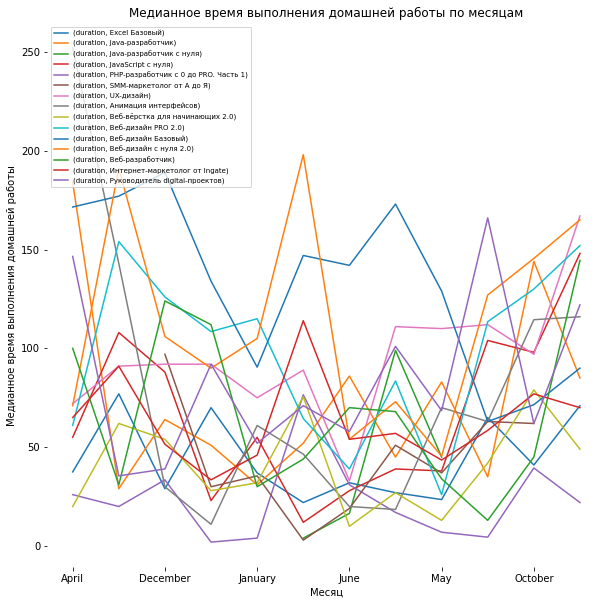

In [72]:
df_6 = df.pivot_table(index='month', columns='title')
ax = df_6.plot.line(figsize=(10,10), legend=True, title='Медианное время выполнения домашней работы по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Медианное время выполнения домашней работы')
ax.legend(loc='upper left', fontsize=7)
plt.box(on=None)
plt.show()

**3.5**

**Исходя из полученных данных можно сделать вывод, что:**  
1) Медианное время выполнения экзаменационных и дпиломных работ (в курсах, где они есть) значительно вышел остальных.  
2) В курсе **'UX дизайн'** чередуются простые и сложные модули.  
3) В курсе **'Веб-разработчик'** последний модуль занимает слишком много времени по сравнению с остальными, что свидетельствует о нехватке информации для студентов.  
4) В месяцах, когда много праздников (каникул), время выполнения д/з уменьшается, что свидетельствует о наличии большего свободного времени у студентов.  
5) В январе-марте время выполнения д/з увеличивается, т.к. занятость студентов на основной работе или учебё возрастает.

-------------------------------------------------------------------------------------------------------------------------------

## 4. Расчет конверсии

**4.1**

In [73]:
#конверсия перехода студентов из одного модуля в другой на каждом курсе
df4 = df_total[(df_total['is_homework'] == True)]

df4['start_date'] = pd.to_datetime(pd.to_datetime(df4['start_date']).dt.strftime('%Y/%m/%d'))
df4['finish_date'] = pd.to_datetime(pd.to_datetime(df4['finish_date']).dt.strftime('%Y/%m/%d'))

hw_count = pd.DataFrame(df4.groupby(['title', 'module_title'])['lesson_number'].nunique()).reset_index()
hw_count.columns = ['title', 'module_title', 'hw_count_in_mod']

main = df4.merge(hw_count, how='inner', on=['title', 'module_title'])
main = main.drop(['course_id', 'lesson_number', 'lesson_title',\
                 'lesson_token', 'is_video', 'is_homework', 'progress_id', 'field'], axis=1)
main['hw_done'] = main['status'] == 'done'
main['hw_done'] = main['hw_done'].replace(True, 1)
main['hw_done'] = pd.to_numeric(main['hw_done'], downcast='integer')

student_hw_count = pd.DataFrame(main.groupby(['title', 'module_title', 'student_id'])['hw_done'].sum()).reset_index()
main = main.drop(['status', 'hw_done'], axis=1)

main = main.merge(student_hw_count, how='inner', on=['title', 'module_title', 'student_id'])
main['result_module'] = main['hw_count_in_mod'] == main['hw_done']
main['result_module'] = main['result_module'].replace(True, 1)
main['result_module'] = pd.to_numeric(main['result_module'], downcast='integer')

main_with_result = pd.DataFrame(main.groupby(['title', 'module_title', 'module_number'])['result_module'].sum())
main_with_start_students = pd.DataFrame(main.groupby(['title', 'module_title', 'module_number'])['student_id'].nunique())

main_result = main_with_result.merge(main_with_start_students, how='inner', on=['title', 'module_title', 'module_number'])
main_result.columns = ['finish_module', 'start_module']
main_result['finish_module'] = pd.to_numeric(main_result['finish_module'], downcast='integer')

main_result['conversion'] = main_result['start_module'] / main_result['finish_module'].shift(1)
main_result

<ipython-input-73-5d910cd8d1d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['start_date'] = pd.to_datetime(pd.to_datetime(df4['start_date']).dt.strftime('%Y/%m/%d'))
<ipython-input-73-5d910cd8d1d9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['finish_date'] = pd.to_datetime(pd.to_datetime(df4['finish_date']).dt.strftime('%Y/%m/%d'))


finish_module  \
title                         module_title                                       module_number                  
Excel Базовый                  Визуализация данных Excel                         7                        200   
                              Основной функционал Excel                          1                        458   
                              Основной функционал Excel (продолжение)            2                        406   
                              Сводные таблицы Excel                              8                        186   
                              Формулы и функции Excel. Более сложные формулы     5                        270   
...                                                                                                       ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                  12                        88   
                              Требовательность digital-продюсера                 3                        345   
                              Управление временем                                9                        129   
                              Управление дизайнерами. Разработка дизайна по s... 14                        64   
                              Экологичный путь менеджера                         1                        560   

                                                                                                start_module  \
title                         module_title                                       module_number                 
Excel Базовый                  Визуализация данных Excel                         7                       238   
                              Основной функционал Excel                          1                       518   
                              Основной функционал Excel (продолжение)            2                       434   
                              Сводные таблицы Excel                              8                       202   
                              Формулы и функции Excel. Более сложные формулы     5                       298   
...                                                                                                      ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                  12                       95   
                              Требовательность digital-продюсера                 3                       402   
                              Управление временем                                9                       136   
                              Управление дизайнерами. Разработка дизайна по s... 14                       71   
                              Экологичный путь менеджера                         1                       598   

                                                                                                conversion  
title                         module_title                                       module_number              
Excel Базовый                  Визуализация данных Excel                         7                     NaN  
                              Основной функционал Excel                          1                2.590000  
                              Основной функционал Excel (продолжение)            2                0.947598  
                              Сводные таблицы Excel                              8                0.497537  
                              Формулы и функции Excel. Более сложные формулы     5                1.602151  
...                                                                                                    ...  
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                  12               0.253333  
                              Требовательность digital-продюсера                 3                4.568182  
                              Управление временем                              

**4.2**

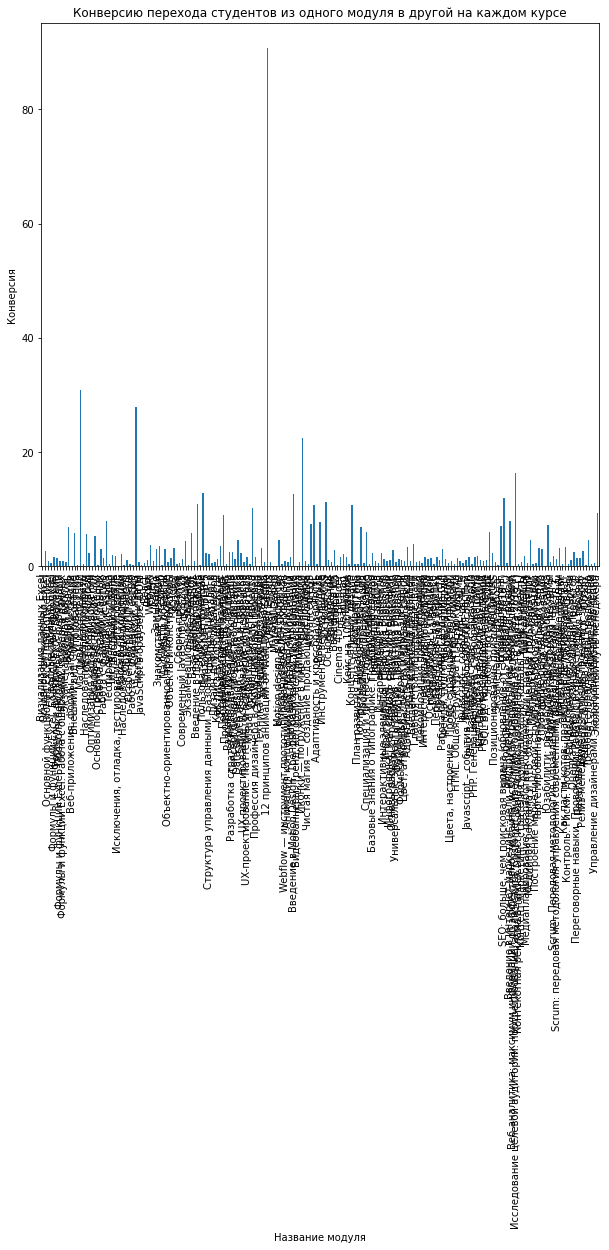

In [74]:
#bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе
main_result2 = main_result.reset_index()
ax = main_result2.plot.bar(x='module_title', y='conversion', figsize=(10,10), legend=False,\
                           title='Конверсию перехода студентов из одного модуля в другой на каждом курсе')
ax.set_xlabel('Название модуля')
ax.set_ylabel('Конверсия')
plt.xticks(rotation=90)
plt.show()

**4.3**

In [75]:
main_result1 = main_result.reset_index()
main_result1 = main_result1.drop(['finish_module', 'start_module'], axis=1)

In [76]:
df_total1 = df_total
df_total1 = df_total1.drop(['course_id', 'module_number', 'lesson_number',
       'lesson_title', 'lesson_token', 'is_video', 'is_homework',
       'progress_id', 'student_id', 'status', 'start_date',
       'finish_date'], axis=1)
df_total1 = pd.DataFrame(df_total1.groupby(['title', 'module_title'])['field'].unique()).reset_index()
main_result1 = main_result1.merge(df_total1, how='inner', on=['title', 'module_title'])

main_result1['field'] = main_result1['field'].astype(str)
main_result1['module_title'] = main_result1['module_title'].str.cat(main_result1['module_number'].astype(str), sep =" ;")
main_result1.head()

,title,module_title,module_number,conversion,field
0,Excel Базовый,Визуализация данных Excel ;7,7,NaN,['Business']
1,Excel Базовый,Основной функционал Excel ;1,1,2.590000,['Business']
2,Excel Базовый,Основной функционал Excel (продолжение) ;2,2,0.947598,['Business']
3,Excel Базовый,Сводные таблицы Excel ;8,8,0.497537,['Business']
4,Excel Базовый,Формулы и функции Excel. Более сложные формулы ;5,5,1.602151,['Business']


In [77]:
main_result1 = main_result1.sort_values(['title', 'module_number'], ascending=False).groupby(['title', 'module_title']).head()
main_result1 = main_result1.drop(['module_number'], axis=1)
main_result1

,title,module_title,conversion,field
180,Руководитель digital-проектов,Контроль. Риски. Поощрения. Наказания. Обратна...,0.297674,['Business']
181,Руководитель digital-проектов,Основы технической грамотности ;15,1.137931,['Business']
189,Руководитель digital-проектов,Управление дизайнерами. Разработка дизайна по ...,0.550388,['Business']
178,Руководитель digital-проектов,Интеграционные проекты. ;13,0.388393,['Business']
186,Руководитель digital-проектов,Решение факапов. Lean/TOC. Обзор. ;12,0.253333,['Business']
...,...,...,...,...
4,Excel Базовый,Формулы и функции Excel. Более сложные формулы ;5,1.602151,['Business']
6,Excel Базовый,Формулы и функции Excel. Продолжаем работать с...,0.891473,['Business']
5,Excel Базовый,Формулы и функции Excel. Введение ;3,1.474074,['Business']
2,Excel Базовый,Основной функционал Excel (продолжение) ;2,0.947598,['Business']


In [78]:
main_result1.groupby('title')['field'].unique().to_dict()

{'Excel Базовый': array(["['Business']"], dtype=object),
 'Java-разработчик': array(["['Development']"], dtype=object),
 'Java-разработчик c нуля': array(["['Development']"], dtype=object),
 'JavaScript с нуля': array(["['Development']"], dtype=object),
 'PHP-разработчик с 0 до PRO. Часть 1': array(["['Development']"], dtype=object),
 'SMM-маркетолог от А до Я': array(["['Marketing']"], dtype=object),
 'UX-дизайн': array(["['Design']"], dtype=object),
 'Анимация интерфейсов': array(["['Design']"], dtype=object),
 'Веб-вёрстка для начинающих 2.0': array(["['Development']"], dtype=object),
 'Веб-дизайн PRO 2.0': array(["['Design']"], dtype=object),
 'Веб-дизайн Базовый': array(["['Design']"], dtype=object),
 'Веб-дизайн с нуля 2.0': array(["['Design']"], dtype=object),
 'Веб-разработчик': array(["['Development']"], dtype=object),
 'Интернет-маркетолог от Ingate': array(["['Marketing']"], dtype=object),
 'Руководитель digital-проектов': array(["['Business']"], dtype=object)}

In [79]:
color_dict = {'Excel Базовый' : 'r', 'Java-разработчик' : 'b', 'Java-разработчик c нуля' : 'b', 'JavaScript с нуля' : 'b',\
              'PHP-разработчик с 0 до PRO. Часть 1' : 'b', 'SMM-маркетолог от А до Я' : 'y', 'UX-дизайн' : 'c',\
              'Анимация интерфейсов' : 'c', 'Веб-вёрстка для начинающих 2.0' : 'b', 'Веб-дизайн PRO 2.0':'c',\
              'Веб-дизайн Базовый':'c', 'Веб-дизайн с нуля 2.0':'c', 'Веб-разработчик':'b',\
              'Интернет-маркетолог от Ingate': 'y', 'Руководитель digital-проектов': 'r'} 

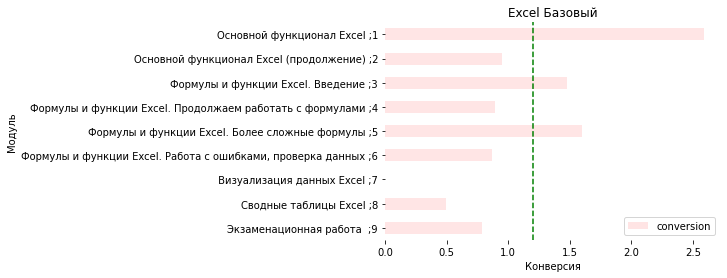

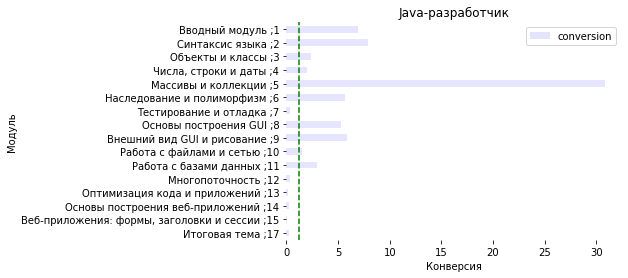

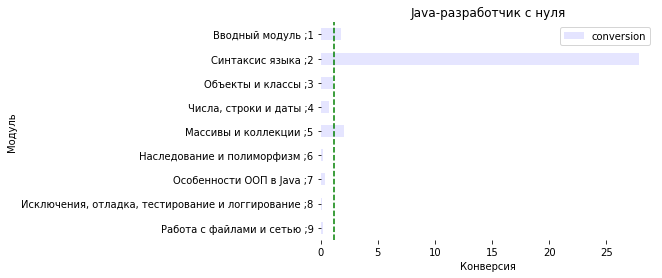

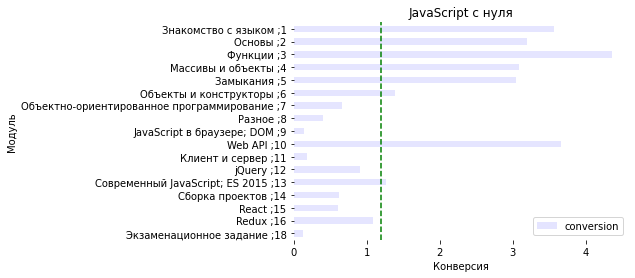

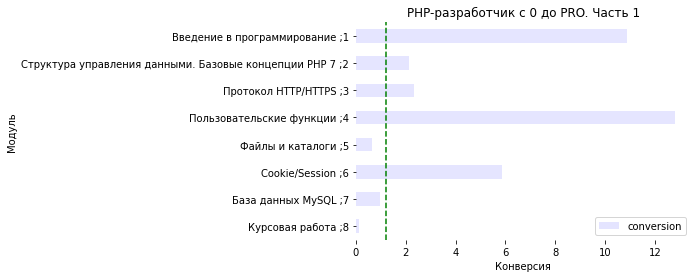

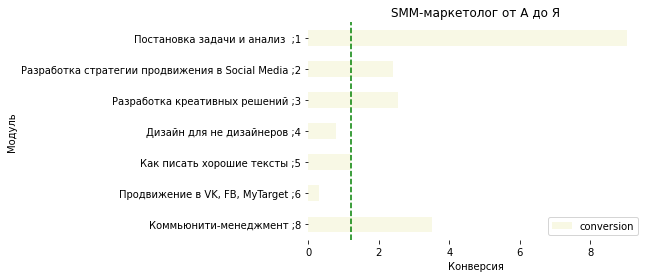

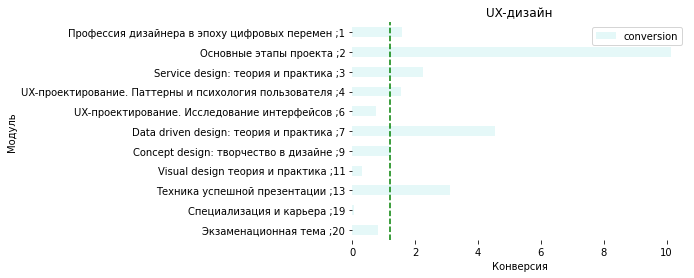

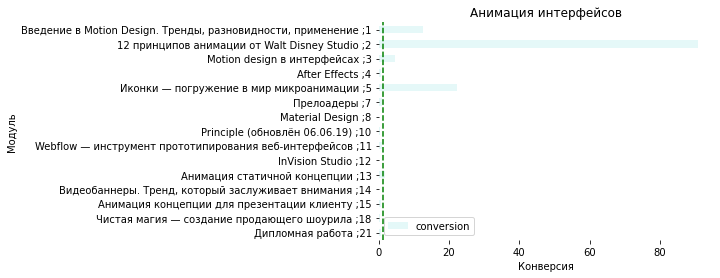

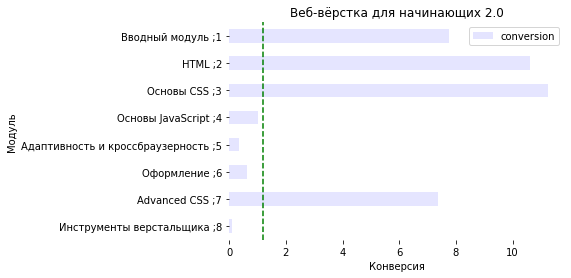

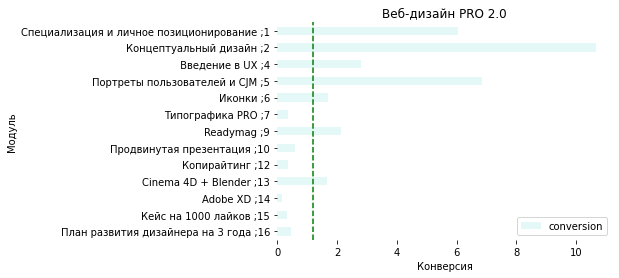

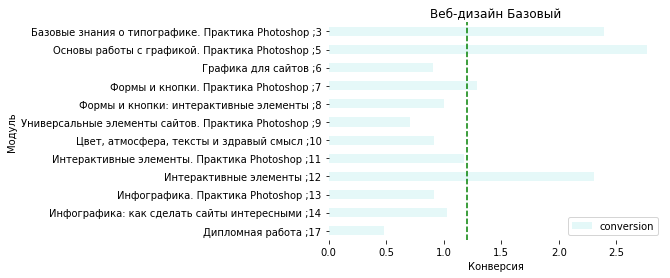

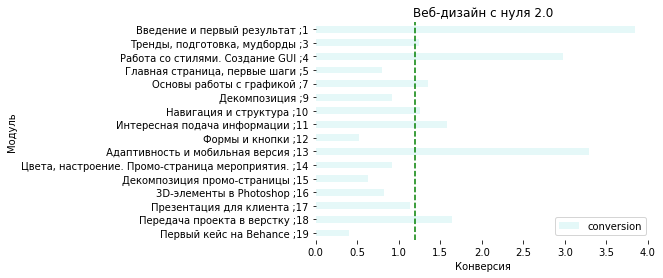

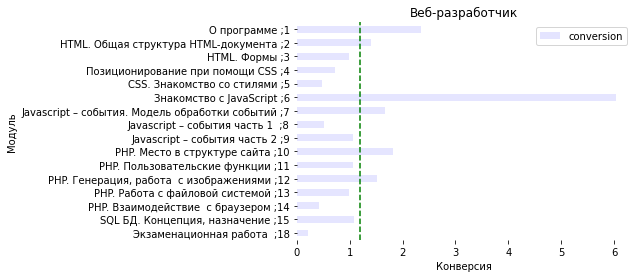

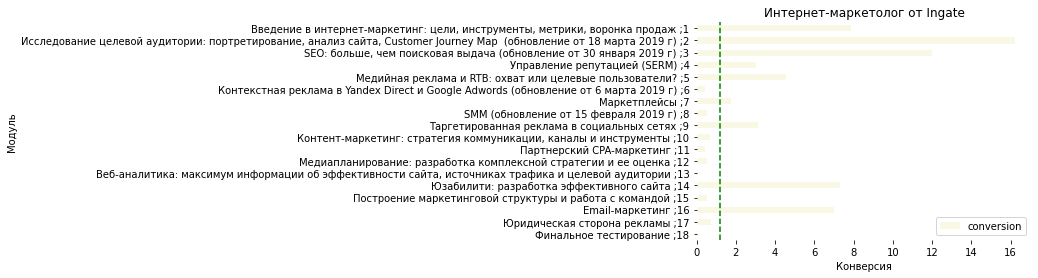

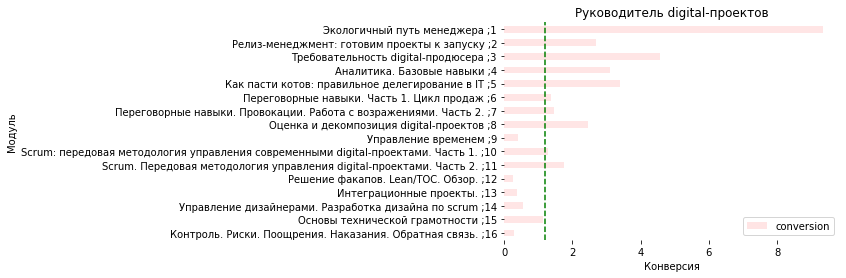

In [80]:
#bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе
for i in main_result1.groupby('title'):
    subdf_3 = i[1].set_index('module_title')
    ax = subdf_3.plot.barh(title=i[0], legend=True, alpha=0.1, color=color_dict[i[0]])
    ax.set_xlabel('Конверсия')
    ax.set_ylabel('Модуль')
    plt.axvline(main_result1['conversion'].median(), color='g', linestyle='dashed', label='медиана')
    plt.box(on=None)
    plt.show()

**4.4**

**Исходя из полученных данных можно сделать вывод, что:**  
1) В курсе **'Excel базовый'** модуль *'Визуализация данных'* многие пропустили.  
2) В курсе **'Java разработчик'** совсем небольшой процент студентов доходит до конца, что может говорить о большой протяженности курса или разочаровании студентов.  
3) **'PHP-разработчик с 0 до PRO часть 1'** - на модуле *'База данных MySQL'* отсеилось много студентов, что может свидетельствовать о плохом качестве модуля или сложности работы с SQL.  
4) **'SMM-маркетолог'** - студентов не заинтересовал модуль *'Продвижение в VK,FB,MyTarget'*.  
5) Курсе **'Анимация интерфейсов'** является самым сложным или самым не проработанным судя по конверсии.

-------------------------------------------------------------------------------------------

## 5. Метрика успеваемости 

Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. 

*Чтобы выявить студентов, которые забросили прохождение курса, нужно:*  
1) Определить дату выгрузки данных, к которой мы привяжемся.  
2) Выявить студентов, которые не выполнили все домашние работы.  
3) Определить допустимый срок "тишины" студента (взял 180 дней).  
4) Отфильтровать ДФ по дате загрузки - 180 дней.

In [152]:
test_df = df_total[(df_total['is_homework'] == True)]

test_df['start_date'] = pd.to_datetime(pd.to_datetime(df4['start_date']).dt.strftime('%Y/%m/%d'))
test_df['finish_date'] = pd.to_datetime(pd.to_datetime(df4['finish_date']).dt.strftime('%Y/%m/%d'))

load_date = test_df['finish_date'].sort_values(ascending=False).iloc[1]

hw_count = pd.DataFrame(test_df.groupby(['title', 'module_title'])['lesson_number'].nunique()).reset_index()
hw_count.columns = ['title', 'module_title', 'hw_count_in_mod']

test_main = test_df.merge(hw_count, how='inner', on=['title', 'module_title'])
test_main = test_main.drop(['course_id', 'module_number', 'lesson_number', 'lesson_title', 'lesson_token', 'is_video',\
                            'is_homework', 'progress_id', 'field'], axis=1)
test_main = test_main[test_main['status'] != 'done']

deadline_date = load_date - timedelta(days=180)

test_main = test_main[test_main['start_date'] < deadline_date]
test_main['time of silence'] = load_date - test_main['start_date']
test_main
pd.DataFrame(test_main.groupby(['title', 'time of silence'])['student_id'].unique())

<ipython-input-152-39999101d185>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['start_date'] = pd.to_datetime(pd.to_datetime(df4['start_date']).dt.strftime('%Y/%m/%d'))
<ipython-input-152-39999101d185>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['finish_date'] = pd.to_datetime(pd.to_datetime(df4['finish_date']).dt.strftime('%Y/%m/%d'))


student_id
title                         time of silence                                                   
Excel Базовый                 182 days                        [b0e708bd1326763ba898afb9ba028f0a]
                              183 days         [12298ae41fda8e38b07a08356a893686, 74cdb5c2211...
                              184 days                        [ee9a430368aff7e1dbb759e37b85db22]
                              185 days                        [f6fe1f1090f6c0535492da1bd6bb3bd8]
                              190 days                        [79fd95fca3420491b25057aaaa19c9a0]
...                                                                                          ...
Руководитель digital-проектов 501 days         [8050944800864a503f9d84b20162718c, eaca10f41fd...
                              503 days         [0dfa4dc2496b7641c86e0201900e35d0, d98281f387a...
                              505 days         [02583b1030c274061fb37818da9a8813, 1e683c1c8ac...
                              511 days         [90a68d71df612bfb1f80fe78cde2173f, 037ecd8428a...
                              512 days         [521c355a69fdb747b342c2b77de15d39, 46e62037b98...

[2003 rows x 1 columns]